In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import rasterio
from rasterio.plot import show
import geopandas as gpd

In [2]:
# Open TIFF file for sen2
def loadTiff(band):
    directory =f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/Sentinel/s2/'
    fn = f'{directory}2024-02-04-00_00_2024-02-04-23_59_Sentinel-2_L2A_B0{band}_(Raw).tiff'
    with rasterio.open(fn) as src: band1 = src.read(1)
    with xr.open_dataset(fn) as openDf: df = openDf
    return(band1, df)
B03, df3 = loadTiff(3) #green
B04, df4 = loadTiff(4) #red
B08, df8 = loadTiff(8) #NIR

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_3376915/2230351630.py:3: RuntimeWarning: invalid value encountered in divide
  ndwi = (green_band - nir_band)/(green_band + nir_band)


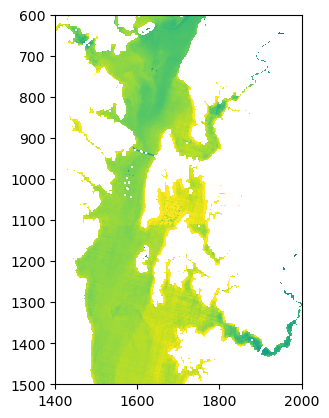

<Axes: >

In [3]:
#Calculate NDWI
def createNDWI(green_band, nir_band):
    ndwi = (green_band - nir_band)/(green_band + nir_band)
    return ndwi
ndwi = createNDWI(B03, B08)
ndwi[ndwi<-0.1] = np.nan
plt.xlim(1400,2000)
plt.ylim(1500, 600)
show(ndwi)

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_3376915/2611370172.py:3: RuntimeWarning: invalid value encountered in divide
  ndti = (red_band - green_band)/(red_band + green_band)


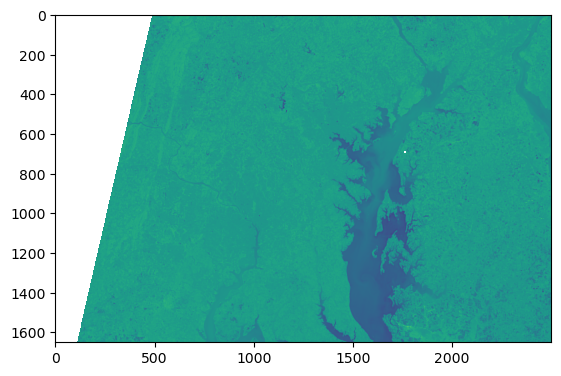

<Axes: >

In [4]:
#Calculate NDTI
def createNDTI(green_band, red_band):
    ndti = (red_band - green_band)/(red_band + green_band)
    return ndti
ndti = createNDTI(B03, B04)
show(ndti)

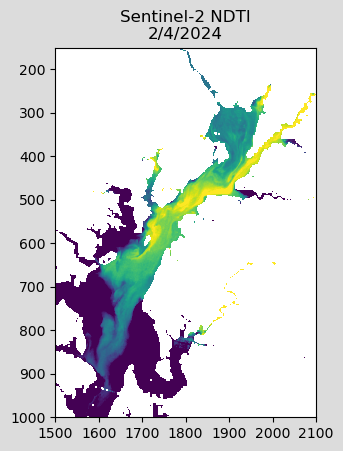

<Axes: title={'center': 'Sentinel-2 NDTI\n2/4/2024'}>

In [47]:
mask = np.isnan(ndwi)
plt.grid(zorder = 0, c ='white')
ndti_masked = np.ma.masked_array(ndti, mask)
plt.xlim(1500,2100)
plt.ylim(1000, 150)
plt.gcf().set_facecolor('gainsboro')
plt.title('Sentinel-2 NDTI\n2/4/2024')

rasterio.plot.show(ndti_masked, vmin = -0.15, vmax = 0.02, zorder = 2)

In [58]:
# Create geolocated dataset
geolocatedDs = df3
geolocatedDs['ndti_masked'] = (['y','x',],ndti_masked)

#read shapefile
shapefile_path = r"/panfs/ccds02/nobackup/people/slsmit34/shapefiles/Chesapeake_Bay_Shoreline_High_Resolution.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs(geolocatedDs.rio.crs)

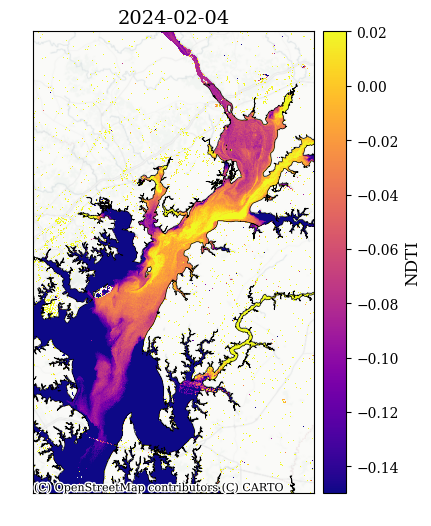

<Figure size 640x480 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import rcParams

# Set global font
rcParams['font.family'] = 'serif'

# make fig
fig, ax = plt.subplots(figsize=(6,6))
ax.set_facecolor('white')

# Add data
im = geolocatedDs['ndti_masked'].plot(ax=ax, cmap='plasma', vmin = -0.15, vmax = 0.02, add_colorbar=False)
#im = composite_mean['LST'].plot(ax=ax, cmap=cmap, vmin = 75, vmax = 105, add_colorbar=False)

#shapefile and boundary
gdf.boundary.plot(ax=ax, edgecolor='black', alpha=1, lw = 0.5)
plt.ylim(38.9, 39.7)
plt.xlim(-76.52, -75.9)

# Add basemap
cx.add_basemap(ax, crs=geolocatedDs.rio.crs.to_string(), source=cx.providers.CartoDB.PositronNoLabels)

# colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('NDTI', fontsize=12)
#cbar.ax.tick_params(labelsize=10)

#labels and grid
ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel(' ', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

ax.set_title('2024-02-04', fontsize=14)
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])

# Export as png
#output_filename = f'C:/Users/slsmit34/OneDrive - NASA/Documents/pg county/Night/fromMukul_unlabeled/{TOD}_JJA_Map_OneScale_2.png'
#plt.savefig(output_filename, format='png', dpi = 300)
plt.show()

plt.tight_layout()
